In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

# 1.1 Call sklearn libraries

# 1.1.1 Split data into train and test data
from sklearn.model_selection import train_test_split

# 1.1.2 PReprocessong:
from sklearn.preprocessing import StandardScaler

# 1.1.3 Import class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as dtree

# 1.1.7
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\Dell\\Downloads\\archive (2)\income_evaluation.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [6]:
df.columns = list(map(lambda a: a.lstrip(), df.columns))
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [7]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [8]:
#There are question marks in the columns instead of 'NaN' or 'None' values. Question marks signalize missing values, that is why they will be removed.

shape0 = df.shape[0]
for column in df.columns:
    df[column].replace(' ?', np.NaN, inplace=True)
df = df.dropna().reset_index().drop(columns=['index'])
shape1 = df.shape[0]
print(str(shape0 - shape1) + ' rows have been removed.')

2399 rows have been removed.


In [9]:
income = df.income.value_counts()
income

 <=50K    22654
 >50K      7508
Name: income, dtype: int64

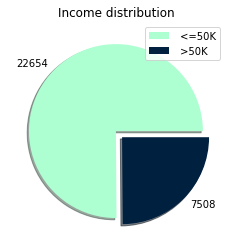

In [12]:
explode = [0, 0.1]
plt.pie(income, labels=income.values, colors=colors, explode = explode, shadow=True)
plt.title('Income distribution')
plt.legend(labels=income.index)

In [11]:
df['income'].replace([' <=50K',' >50K'],[1,0], inplace=True)

In [13]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int64
dtype: object

In [14]:
# object type variables cannot be included in a correlation heatmap.
stats = df.select_dtypes(['float', 'int64']).drop(columns=['income'])

Text(0.5, 1.0, 'Correlation Factors Heat Map')

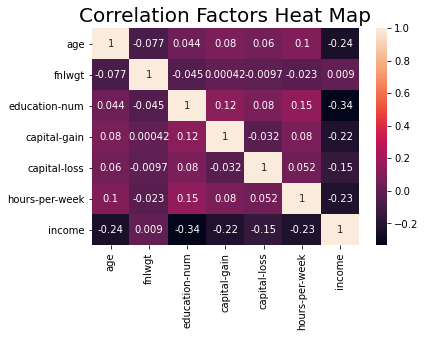

In [15]:
#to see the correaltion between the various variables
sns.heatmap(df.corr(), annot=True).set_title('Correlation Factors Heat Map', color='black', size='20')

In [16]:
df_final = pd.get_dummies(df)
df_final.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X = df_final.drop(columns=['income'])
y = df_final['income']

# Instantiate object
ss = StandardScaler()

# Train object on data
ss.fit(X)

# Trandform data
X = ss.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
ct = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
# 5.1
_=ct.fit(X_train,y_train)

In [20]:
y_te = ct.predict(X_test)
np.sum((y_test == y_te))/y_test.size

0.8046192949497182

In [21]:
fi = ct.feature_importances_
fi

array([1.25530173e-01, 1.89464762e-01, 1.04206784e-01, 9.81470000e-02,
       3.31832887e-02, 6.75410844e-02, 6.44597116e-03, 8.62810076e-03,
       9.92151081e-03, 4.58992275e-03, 9.05094174e-03, 4.89728385e-03,
       1.57326106e-04, 6.00755611e-04, 7.48032660e-04, 7.08412170e-04,
       0.00000000e+00, 1.61304448e-04, 6.79274049e-04, 1.68503608e-04,
       9.36833598e-04, 2.37810143e-03, 1.70839205e-03, 4.98078213e-04,
       2.77451730e-03, 2.21643352e-03, 0.00000000e+00, 1.22606208e-03,
       3.73549322e-03, 2.61109311e-03, 6.87633454e-04, 1.87654204e-01,
       1.62635148e-03, 3.35550788e-03, 1.69729722e-03, 9.56706259e-04,
       7.48442769e-03, 0.00000000e+00, 7.65498447e-03, 1.13545845e-02,
       3.51304502e-03, 2.86620859e-03, 5.53193676e-03, 4.64616684e-03,
       0.00000000e+00, 9.00999377e-03, 2.29297885e-03, 7.18424175e-03,
       5.47287838e-03, 5.21568898e-03, 2.44047741e-03, 2.97555315e-03,
       8.95038004e-04, 1.11127371e-03, 2.63310105e-03, 4.25105097e-03,
      

In [22]:
list(zip(df.columns, fi))

[('age', 0.12553017251436205),
 ('workclass', 0.18946476187571878),
 ('fnlwgt', 0.10420678354636384),
 ('education', 0.09814699997621383),
 ('education-num', 0.03318328871588896),
 ('marital-status', 0.06754108444746805),
 ('occupation', 0.00644597115593279),
 ('relationship', 0.008628100763094167),
 ('race', 0.00992151080784314),
 ('sex', 0.00458992274588997),
 ('capital-gain', 0.009050941742539469),
 ('capital-loss', 0.0048972838460411275),
 ('hours-per-week', 0.0001573261061576012),
 ('native-country', 0.0006007556109185529),
 ('income', 0.0007480326596612745)]

In [23]:
from sklearn.ensemble import RandomForestClassifier # using random forest 

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8452867720190076


When using decision tree , the accuracy was 80% , while using the Random Forest Classifier accuracy has increased to 85%